<a href="https://colab.research.google.com/github/abhi2896/Data_Science/blob/main/complete_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2] 
}

In [3]:
import pandas as pd

In [4]:
df  = pd.DataFrame(data , index = ["a","b","c","d"])

In [5]:
df

,apples,oranges
a,3,0
b,2,3
c,0,7
d,1,2


In [6]:
df.loc["a"]  #loc is use to acess rows

apples     3
oranges    0
Name: a, dtype: int64

In [7]:
#df = pd.read_csv('purchases.json')
df = pd.read_json('/content/sample_data/anscombe.json')   #colabs dataset
df.head(4)

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81


In [8]:
#df = df.set_index("series")
#df["Series"].unique()
df["Series"].nunique()


4

Reading Different type of Files

In [9]:
#df.to_csv('new_purchases.csv')
#df.to_json('new_purchases.json')
#df.to_sql('new_purchases', con)   #con is the name table

Adding Index at the time of Data Loading

In [10]:
#df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")    

Viewing your data

In [11]:
df.head()
df.tail()
df.info()  # information about your data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


Handling duplicates

In [12]:
temp_df = df.append(df)       #Make a copy
temp_df = df.drop_duplicates()
df.drop_duplicates(inplace=True , keep=False)    # want to remove first/last/all intance , use "KEEP"
                                      # keep="False/first/last"

Column cleanup


In [13]:
df.columns   #Return Column name

Index(['Series', 'X', 'Y'], dtype='object')

In [14]:
#df.columns   #Return Column name

df.rename(columns={
        'Series': 'First', 
        'x': 'Second'
    }, inplace=True)


#df.columns

In [15]:
#Excellent. But what if we want to lowercase all names?
df.columns = ["new_first","new_second","new_third"]      # must requires 3 coloumns

In [16]:
#But that's too much work. Instead of just renaming each column manually we can do a list comprehension:
df.columns = [col.lower() for col in df]

df.columns

Index(['new_first', 'new_second', 'new_third'], dtype='object')

How to work with missing values


In [17]:
df.isnull().sum()
df.dropna()
df.dropna(axis=1)

,new_first,new_second,new_third
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


Imputation

In [18]:
revenue_mean = df['new_second'].mean()
df["new_second"].fillna(revenue_mean, inplace=True)


Understanding your variables

In [19]:
df.describe()

,new_second,new_third
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [20]:
#df['new_second'].describe()
#df['new_second'].nunique()
df['new_second'].value_counts().head(10)

8     13
14     3
13     3
12     3
11     3
10     3
9      3
7      3
6      3
5      3
Name: new_second, dtype: int64

Relationships between continuous variables

In [21]:
df.corr()

,new_second,new_third
new_second,1.000000,0.816308
new_third,0.816308,1.000000


DataFrame slicing, selecting, extracting

In [22]:
genre_col = df['new_second']

type(genre_col)

pandas.core.series.Series

In [23]:
genre_col = df[['new_second']]

type(genre_col)

pandas.core.frame.DataFrame

In [24]:
subset = df[['new_first', 'new_second']]

subset.head()

,new_first,new_second
0,I,10
1,I,8
2,I,13
3,I,9
4,I,11


By rows

".loc"   - locates by name
".iloc"  - locates by numerical index

In [25]:
prom = df.loc[2]

prom

new_first        I
new_second      13
new_third     7.58
Name: 2, dtype: object

In [26]:
prom = df.iloc[1]
prom



new_first        I
new_second       8
new_third     6.95
Name: 1, dtype: object

In [27]:
#prom = df.loc[1:4]
prom = df.iloc[1:4,1:2]
prom



,new_second
1,8
2,13
3,9


Conditional selections


In [28]:
condition = (df['new_second'] == 13)
condition.head()


0    False
1    False
2     True
3    False
4    False
Name: new_second, dtype: bool

In [29]:
df[df['new_second'] == "13"]

,new_first,new_second,new_third


In [30]:
df[df['new_second'] >= 8].head(3)

,new_first,new_second,new_third
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58


In [31]:
df[(df['new_second'] == 13) | (df['new_third'] == 7.58)]

,new_first,new_second,new_third
2,I,13,7.58
13,II,13,8.74
24,III,13,12.74


In [34]:
'''
df[
    ((df['year'] >= 2005) & (df['year'] <= 2010))
    & (df['rating'] > 8.0)
    & (df['revenue_millions'] < df['revenue_millions'].quantile(0.25))
]
'''

"\ndf[\n    ((df['year'] >= 2005) & (df['year'] <= 2010))\n    & (df['rating'] > 8.0)\n    & (df['revenue_millions'] < df['revenue_millions'].quantile(0.25))\n]\n"

Applying functions


In [36]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"
#Now we want to send the entire rating column through this function, which is what apply() does:


df["new_category"] = df["new_second"].apply(rating_function)  # this will also add a new coloumn

df.head(2)

,new_first,new_second,new_third,new_category
0,I,10,8.04,good
1,I,8,6.95,good


In [37]:
df["new_third"] = df["new_third"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

df.head(2)

,new_first,new_second,new_third,new_category
0,I,10,good,good
1,I,8,bad,good


Plotting

In [38]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

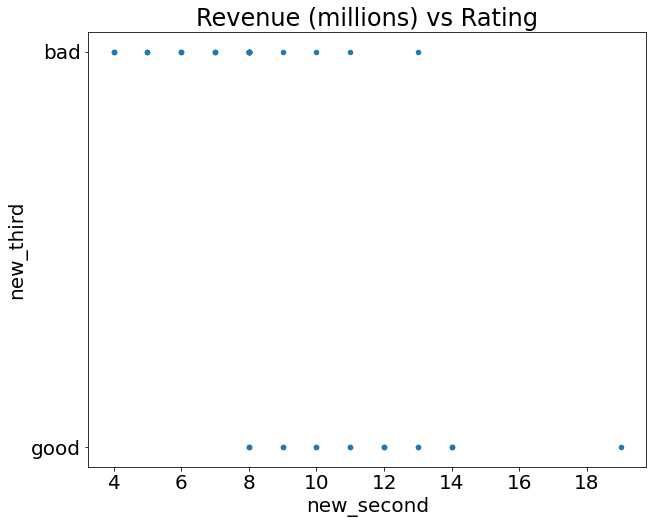

In [39]:
df.plot(kind='scatter', x='new_second', y='new_third', title='Revenue (millions) vs Rating');


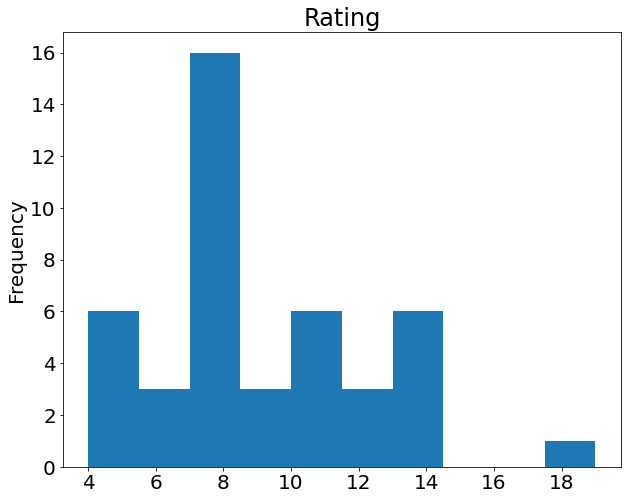

In [40]:
df['new_second'].plot(kind='hist', title='Rating')

In [41]:
df['new_first'].describe()

count     44
unique     4
top       IV
freq      11
Name: new_first, dtype: object

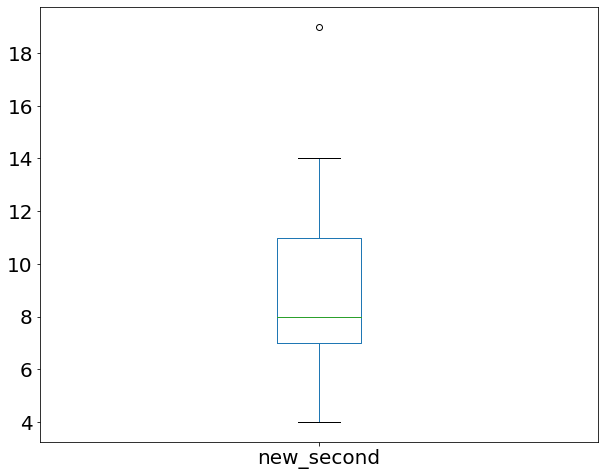

In [43]:
df['new_second'].plot(kind="box");

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


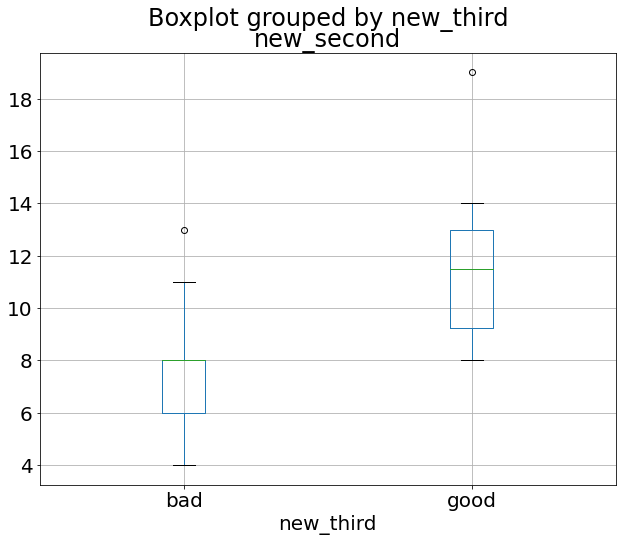

In [45]:
df.boxplot(column='new_second', by='new_third');